In [2]:
import pandas as pd

# 读取数据
file_path = '/content/options_KR.csv'  # 替换为你在 Colab 中的数据路径
data = pd.read_csv(file_path)

# 1. 将 'Date' 列转换为时间格式
data['Date'] = pd.to_datetime(data['Date'])

# 2. 将 'Day_of_a_week' 转换为数值（Monday=1, ..., Friday=5）
day_mapping = {'Mon': 1, 'Tue': 2, 'Wed': 3, 'Thu': 4, 'Fri': 5}
data['Day_of_a_week'] = data['Day_of_a_week'].map(day_mapping)

# 3. 检查缺失值
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

# 4. 显示基本统计描述
basic_statistics = data.describe()
print("\nBasic statistics:\n", basic_statistics)


Missing values:
 Date                               0
VKOSPI                             0
KOSPI200                           0
Open_interest                      0
For_KOSPI_Netbuying_Amount         0
For_Future_Netbuying_Quantity      0
For_Call_Netbuying_Quantity        0
For_Put_Netbuying_Quantity         0
Indiv_Future_Netbuying_Quantity    0
Indiv_Call_Netbuying_Quantity      0
Indiv_Put_Netbuying_Quantity       0
PCRatio                            0
Day_till_expiration                0
Day_of_a_week                      0
dtype: int64

Basic statistics:
                                 Date       VKOSPI     KOSPI200  Open_interest  \
count                           2580  2580.000000  2580.000000   2.580000e+03   
mean   2014-08-09 04:11:43.255813888    16.744302   259.246508   2.303927e+06   
min              2009-06-02 00:00:00     9.720000   174.320000   2.242960e+05   
25%              2011-12-25 06:00:00    13.087500   243.750000   1.013118e+06   
50%              2014-08-04

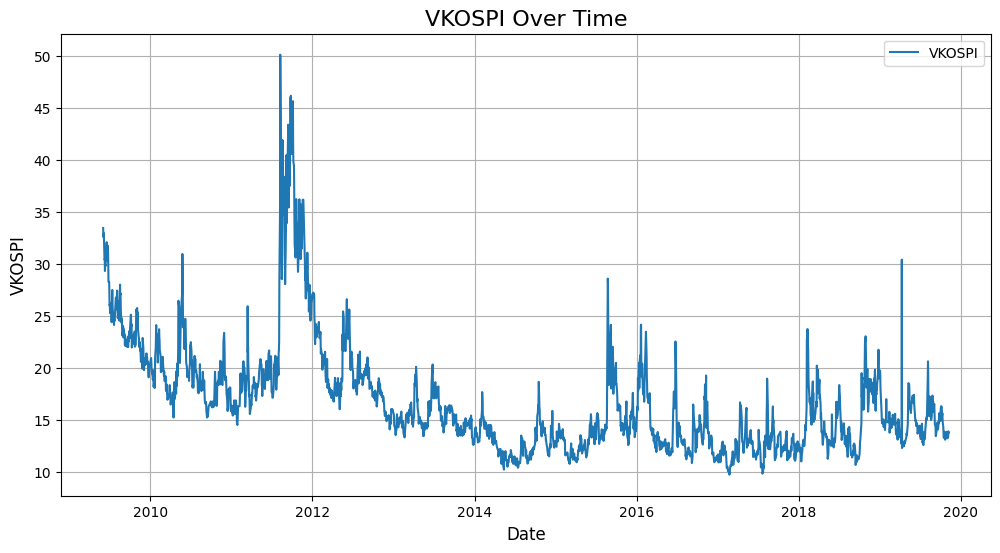

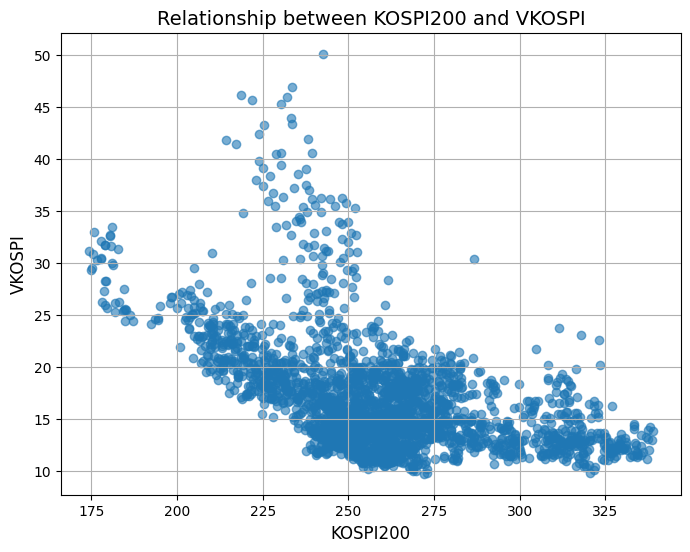

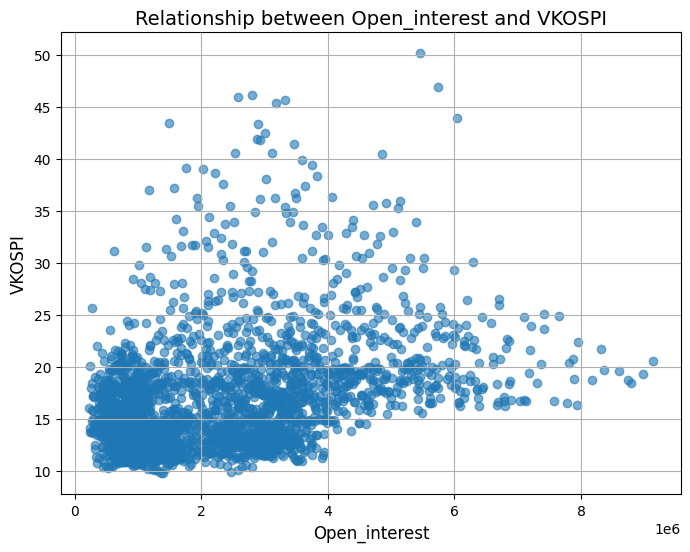

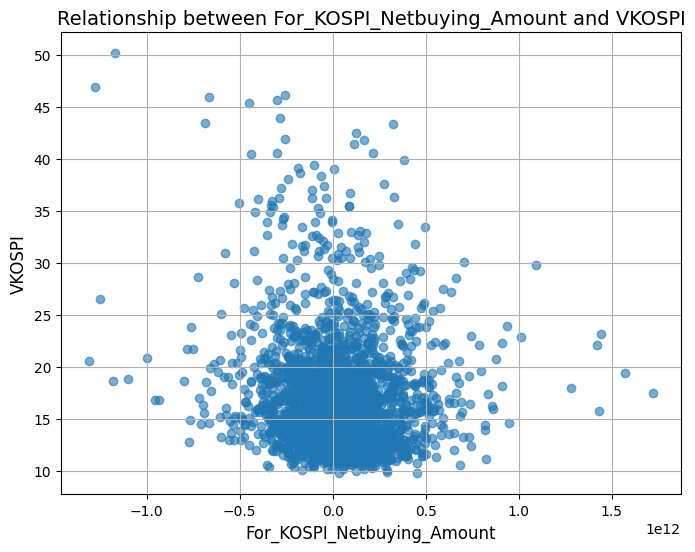

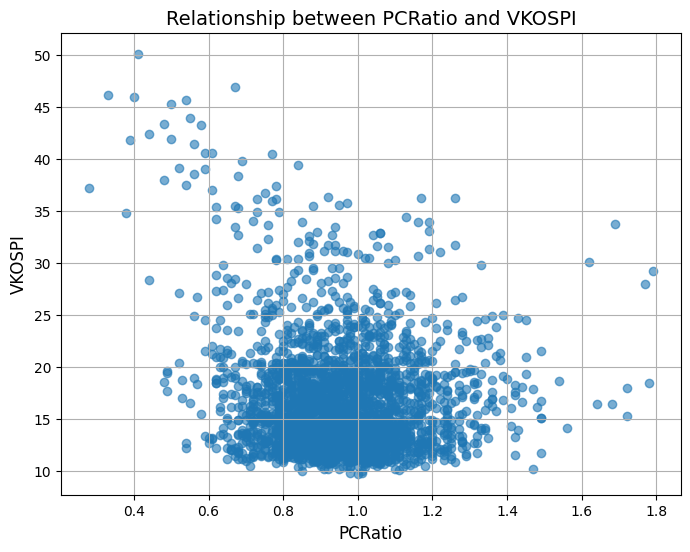

Feature correlations with VKOSPI:
 VKOSPI                             1.000000
Open_interest                      0.375421
Indiv_Call_Netbuying_Quantity      0.255028
Indiv_Put_Netbuying_Quantity       0.212897
For_Call_Netbuying_Quantity        0.033496
Indiv_Future_Netbuying_Quantity   -0.009735
Day_of_a_week                     -0.013373
Day_till_expiration               -0.020580
For_Future_Netbuying_Quantity     -0.020798
For_Put_Netbuying_Quantity        -0.049941
For_KOSPI_Netbuying_Amount        -0.110114
PCRatio                           -0.141403
KOSPI200                          -0.509229
Date                              -0.559305
Name: VKOSPI, dtype: float64


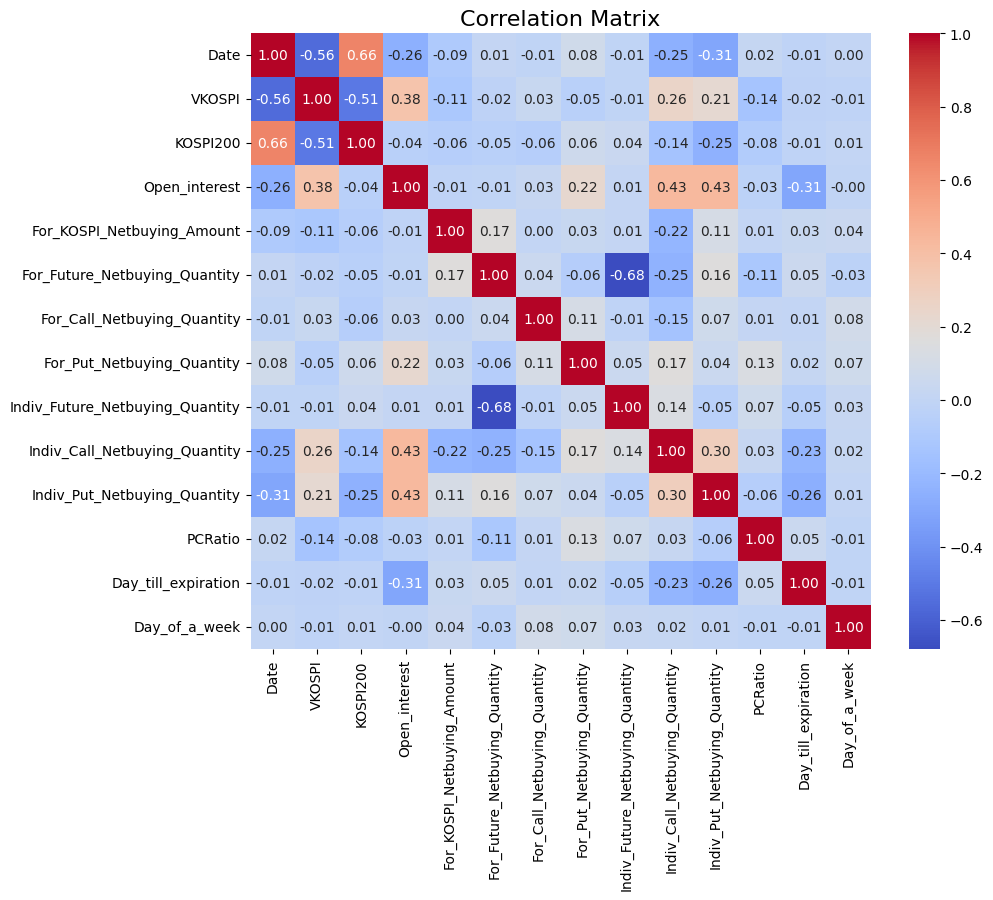

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 绘制 VKOSPI 随时间变化的趋势图
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['VKOSPI'], label='VKOSPI')
plt.title('VKOSPI Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('VKOSPI', fontsize=12)
plt.legend()
plt.grid()
plt.show()

# 2. 绘制特征与 VKOSPI 的散点图，观察可能的关系
features = ['KOSPI200', 'Open_interest', 'For_KOSPI_Netbuying_Amount', 'PCRatio']
for feature in features:
    plt.figure(figsize=(8, 6))
    plt.scatter(data[feature], data['VKOSPI'], alpha=0.6)
    plt.title(f'Relationship between {feature} and VKOSPI', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('VKOSPI', fontsize=12)
    plt.grid()
    plt.show()

# 3. 计算特征与 VKOSPI 的相关性
correlation_matrix = data.corr()
vkospi_correlation = correlation_matrix['VKOSPI'].sort_values(ascending=False)
print("Feature correlations with VKOSPI:\n", vkospi_correlation)

# 4. 绘制热力图展示相关性矩阵
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix', fontsize=16)
plt.show()
